In [ ]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
%matplotlib inline

In [ ]:
# Read the data from the file "Advertising.csv"
filename = 'Advertising.csv'
df_adv = pd.read_csv(filename)


In [ ]:
# Take a quick look of the dataset
df_adv.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [ ]:
subset = df_adv.iloc[5:14].copy()
print(subset)

       TV  Radio  Newspaper  Sales
5     8.7   48.9       75.0    7.2
6    57.5   32.8       23.5   11.8
7   120.2   19.6       11.6   13.2
8     8.6    2.1        1.0    4.8
9   199.8    2.6       21.2   10.6
10   66.1    5.8       24.2    8.6
11  214.7   24.0        4.0   17.4
12   23.8   35.1       65.9    9.2
13   97.5    7.6        7.2    9.7


In [ ]:
import numpy as np

# Example query point (e.g., new ad spend: TV=100, Radio=25)
query = np.array([100, 25])

# Extract features
X = subset[['TV', 'Radio']].values

# Calculate Euclidean distances
distances = np.sqrt(np.sum((X - query) ** 2, axis=1))

# Find index of the nearest neighbor
nearest_idx = np.argmin(distances)

# Get the predicted label (e.g., Sales)
predicted = subset.iloc[nearest_idx]['Sales']

print("Predicted Sales:", predicted)


Predicted Sales: 9.7


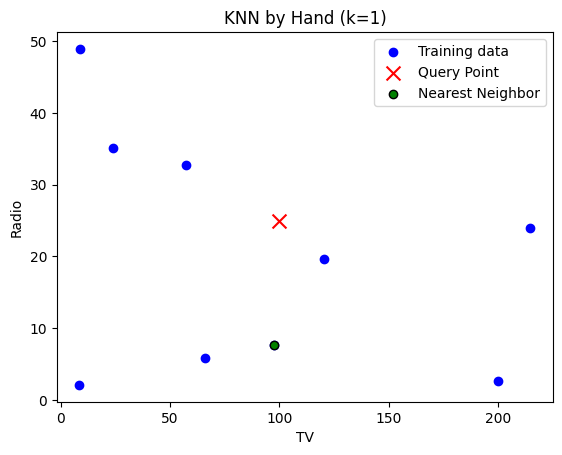

In [ ]:


# Plot all points
plt.scatter(subset['TV'], subset['Radio'], c='blue', label='Training data')

# Plot the query point
plt.scatter(query[0], query[1], c='red', label='Query Point', marker='x', s=100)

# Highlight the nearest neighbor
nearest_point = subset.iloc[nearest_idx]
plt.scatter(nearest_point['TV'], nearest_point['Radio'], c='green', label='Nearest Neighbor', edgecolor='black')

plt.xlabel('TV')
plt.ylabel('Radio')
plt.legend()
plt.title('KNN by Hand (k=1)')
plt.show()


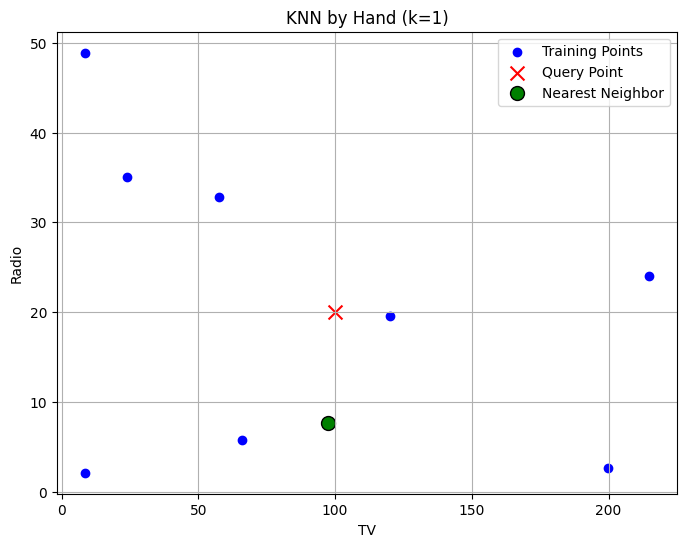

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Read the advertising data
df = pd.read_csv('Advertising.csv')

# Step 2: Get subset from row 5 to row 13 (Python index 5 to 13 → iloc[5:14])
subset = df.iloc[5:14].copy()

# Step 3: Define a query point (new ad values for TV and Radio)
# Feel free to change this to test different query points
query_point = np.array([100, 20])  # Example: TV=100, Radio=20

# Step 4: Extract feature columns for distance calculation
X = subset[['TV', 'Radio']].values  # Adjust if your column names differ

# Step 5: Calculate Euclidean distance from query to each point
distances = np.sqrt(np.sum((X - query_point)**2, axis=1))

# Step 6: Find index of the closest point (k=1)
nearest_index = np.argmin(distances)
nearest_neighbor = subset.iloc[nearest_index]

# Optional: Get predicted label (e.g., Sales)
# predicted_value = nearest_neighbor['Sales']

# Step 7: Plot the graph
plt.figure(figsize=(8, 6))

# Plot all training points
plt.scatter(subset['TV'], subset['Radio'], label='Training Points', c='blue')

# Plot query point
plt.scatter(query_point[0], query_point[1], label='Query Point', c='red', marker='x', s=100)

# Highlight nearest neighbor
plt.scatter(nearest_neighbor['TV'], nearest_neighbor['Radio'], label='Nearest Neighbor', c='green', edgecolor='black', s=100)

# Annotations
plt.xlabel('TV')
plt.ylabel('Radio')
plt.title('KNN by Hand (k=1)')
plt.legend()
plt.grid(True)
plt.show()

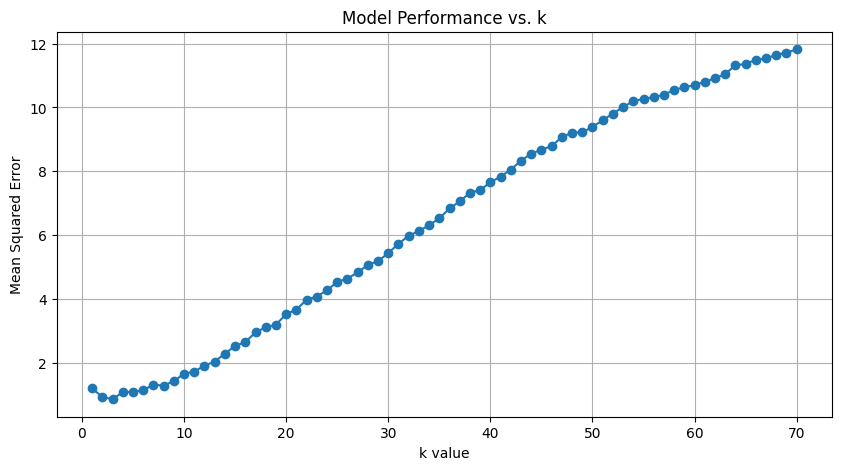

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Step 1: Load the data
# Corrected filename
df = pd.read_csv('Advertising.csv')

# Step 2: Define features (X) and target (y)
X = df[['TV', 'Radio']]  # or more columns if needed
y = df['Sales']  # change to 'Purchased' if classification

# Step 3: Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Try different values of k
k_list = list(range(1, 71))
errors = []

for k in k_list:
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    errors.append(mse)

# Step 5: Plot MSE vs. k
plt.figure(figsize=(10, 5))
plt.plot(k_list, errors, marker='o')
plt.xlabel('k value')
plt.ylabel('Mean Squared Error')
plt.title('Model Performance vs. k')
plt.grid(True)
plt.show()

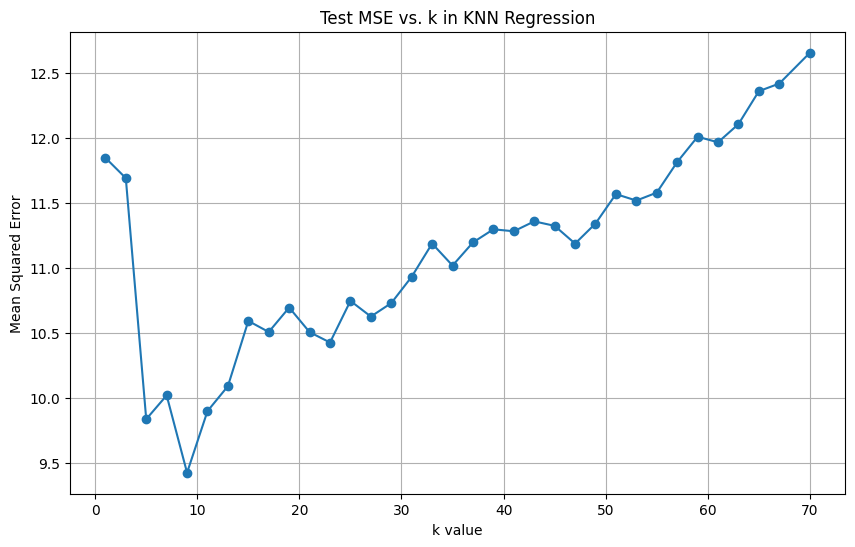

✅ Best k (lowest MSE): 9
Lowest MSE: 9.424336419753084


In [ ]:


# Step 3: Select predictor and response
X = df[['TV']]           # predictor (must be 2D array)
y = df['Sales']          # response (target variable)

# Step 4: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Create a list of k values (must be integer)
k_values = np.linspace(1, 70, 35, dtype=int)  # 35 points between 1 and 70

# Step 6: Initialize dictionary to store MSE values
mse_dict = {}

# Step 7: Loop through k values, fit model, predict, compute MSE
for k in k_values:
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_dict[k] = mse

# Step 8: Plot MSE vs. k
plt.figure(figsize=(10, 6))
plt.plot(list(mse_dict.keys()), list(mse_dict.values()), marker='o')
plt.xlabel('k value')
plt.ylabel('Mean Squared Error')
plt.title('Test MSE vs. k in KNN Regression')
plt.grid(True)
plt.show()

# Step 9: Find the best k (lowest MSE)
best_k = min(mse_dict, key=mse_dict.get)
print(f"✅ Best k (lowest MSE): {best_k}")
print(f"Lowest MSE: {mse_dict[best_k]}")

In [ ]:

#"Linear Regression Using Sklearn".
#First we import the linear regression module
from sklearn.linear_model import LinearRegression
#We use pandas and the method read_csv to read the advertising data
df = pd.read_csv('Advertising.csv')
#We take the TV column and the sales column (x and y)
X = df[['TV']].values
y = df['Sales'].values
reg = LinearRegression()
reg.fit(X,y)
from sklearn.linear_model import LinearRegression
df = pd.read_csv('Advertising.csv')
X = df[['TV']].values
y = df['Sales'].values
reg = LinearRegression()
reg.fit(X,y)
reg.coef_
reg.intercept_
reg.predict(np.array([[100]]))

array([11.78625759])

In [ ]:

import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


In [ ]:
df_results = pd.DataFrame(columns=["Model", "Train R²", "Test R²"])


In [ ]:
from sklearn.model_selection import train_test_split # Import train_test_split

def fit_and_plot_linear(feature, df, df_results): # Pass df and df_results to the function
    X = df[[feature]]
    y = df["Sales"]

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
   # Plot
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=X_train[feature].squeeze(), y=y_train, label="Train") # Use .squeeze() for scatterplot if X_train is a pandas Series
    sns.scatterplot(x=X_test[feature].squeeze(), y=y_test, label="Test") # Use .squeeze() for scatterplot if X_test is a pandas Series
    sns.lineplot(x=X_train[feature].squeeze(), y=y_pred_train, color="red", label="Prediction") # Use .squeeze() for lineplot if X_train is a pandas Series
    plt.title(f"Linear Regression with {feature}")
    plt.xlabel(feature)
    plt.ylabel("Sales")
    plt.legend()
    plt.show()

    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)

    # Append results to the DataFrame
    new_row = pd.DataFrame({"Model": [f"Linear Regression ({feature})"],
                            "Train R²": [r2_train],
                            "Test R²": [r2_test]})
    df_results = pd.concat([df_results, new_row], ignore_index=True)

    return r2_train, r2_test, df_results # Return updated df_results

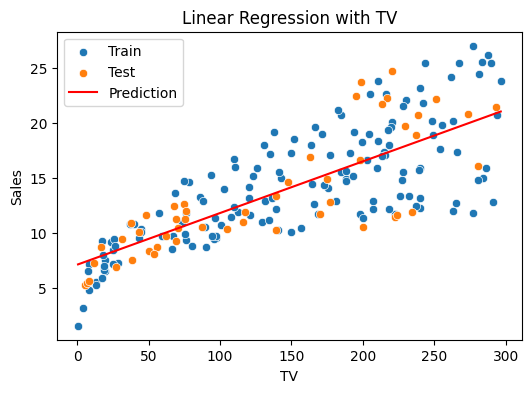

/tmp/ipython-input-14-1977029334.py:32: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_results = pd.concat([df_results, new_row], ignore_index=True)


Train R² for TV: 0.590700527532505
Test R² for TV: 0.6606120390330492



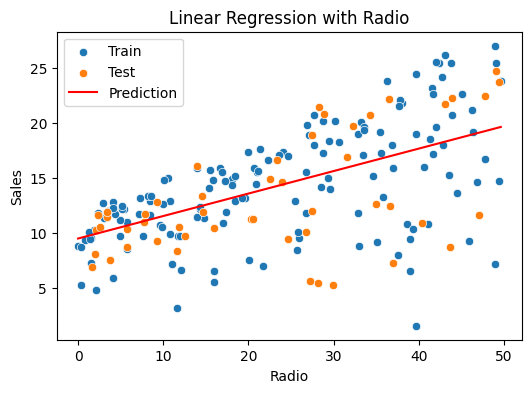

Train R² for Radio: 0.3431325605744906
Test R² for Radio: 0.2672499855897199



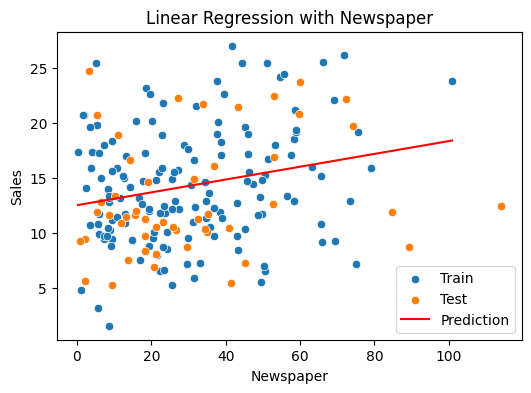

Train R² for Newspaper: 0.05385705103259231
Test R² for Newspaper: 0.0004116081868460464



In [ ]:
for feature in ["TV", "Radio", "Newspaper"]:
    # Call the function with all three required arguments
    r2_train, r2_test, df_results = fit_and_plot_linear(feature, df, df_results)
    print(f"Train R² for {feature}: {r2_train}")
    print(f"Test R² for {feature}: {r2_test}")
    print()

In [ ]:
def fit_and_plot_multi():
    X = df[["TV", "Radio", "Newspaper"]]
    y = df["Sales"]

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Plot actual vs predicted
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=y_train, y=y_pred_train, label="Train")
    sns.scatterplot(x=y_test, y=y_pred_test, label="Test")
    plt.plot([y.min(), y.max()], [y.min(), y.max()], color="red", label="Ideal fit")
    plt.title("Multi-linear Regression (All Features)")
    plt.xlabel("Actual Sales")
    plt.ylabel("Predicted Sales")
    plt.legend()
    plt.show()

    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)

    return r2_train, r2_test


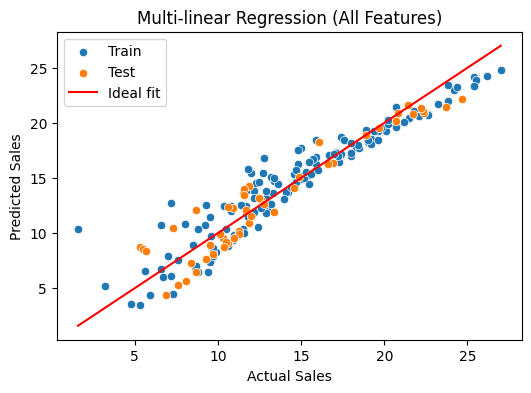

In [ ]:
r2_train, r2_test = fit_and_plot_multi()
df_results.loc[len(df_results)] = ["All features", r2_train, r2_test]


In [ ]:
print(df_results)


                           Model  Train R²   Test R²
0         Linear Regression (TV)  0.590701  0.660612
1      Linear Regression (Radio)  0.343133  0.267250
2  Linear Regression (Newspaper)  0.053857  0.000412
3                   All features  0.896645  0.893516


In [ ]:
#The aim is to understand how to use multi regression.
#Here we will observe the difference in MSE for each model as the predictors change.

from sklearn.metrics import mean_squared_error
from itertools import combinations
from sklearn.linear_model import LinearRegression # Import LinearRegression

# 1. Read the data
# Corrected filename to match previous code blocks
df = pd.read_csv("Advertising.csv")

# 2. Identify predictors and response
predictors = ["TV", "Radio", "Newspaper"]
response = "Sales"

# 3. Split the data into train and test sets
X = df[predictors]
y = df[response]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# 4. Loop through all combinations of predictors (1 to all)
print("Predictor(s) -> MSE on Test Set")
print("-" * 35)

for r in range(1, len(predictors) + 1):
    for combo in combinations(predictors, r):
        # Select the subset of features
        X_train_subset = X_train[list(combo)]
        X_test_subset = X_test[list(combo)]

        # Fit the linear regression model
        model = LinearRegression()
        model.fit(X_train_subset, y_train)

        # Predict and calculate MSE
        y_pred = model.predict(X_test_subset)
        mse = mean_squared_error(y_test, y_pred)

        # Print results
        print(f"{combo} -> MSE: {mse:.4f}")



Predictor(s) -> MSE on Test Set
-----------------------------------
('TV',) -> MSE: 9.1793
('Radio',) -> MSE: 19.8184
('Newspaper',) -> MSE: 27.0355
('TV', 'Radio') -> MSE: 2.8540
('TV', 'Newspaper') -> MSE: 9.5946
('Radio', 'Newspaper') -> MSE: 19.7822
('TV', 'Radio', 'Newspaper') -> MSE: 2.8800


In [ ]:
# How adding multiple predictors can improve models.
#How categorical/qualitative variables must be encoded before they can be used to fit a model.

df = pd.read_csv("credit.csv")
print(df.head())
print(df.dtypes)


    Income  Limit  Rating  Cards  Age  Education  Gender Student Married  \
0   14.891   3606     283      2   34         11    Male      No     Yes   
1  106.025   6645     483      3   82         15  Female     Yes     Yes   
2  104.593   7075     514      4   71         11    Male      No      No   
3  148.924   9504     681      3   36         11  Female      No      No   
4   55.882   4897     357      2   68         16    Male      No     Yes   

   Ethnicity  Balance  
0  Caucasian      333  
1      Asian      903  
2      Asian      580  
3      Asian      964  
4  Caucasian      331  
Income       float64
Limit          int64
Rating         int64
Cards          int64
Age            int64
Education      int64
Gender        object
Student       object
Married       object
Ethnicity     object
Balance        int64
dtype: object


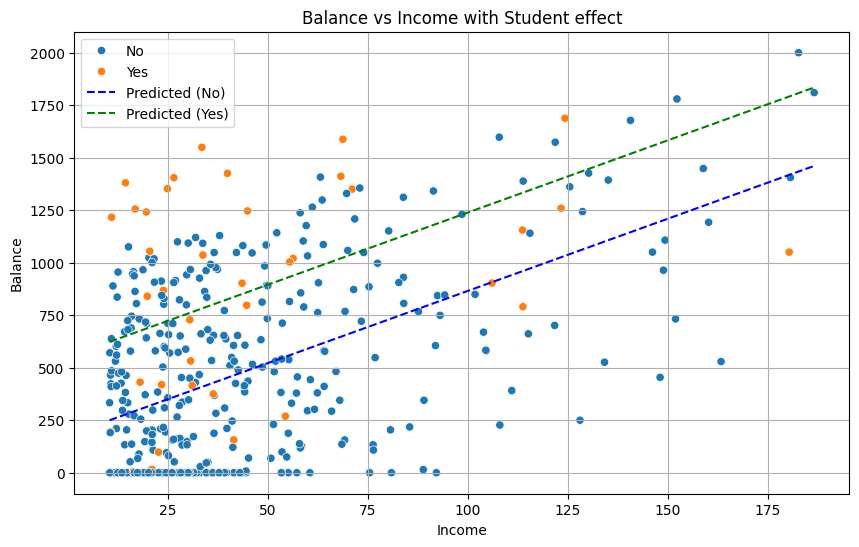

In [ ]:
# Assuming 'Student' is the qualitative column to encode
qual_col = 'Student'
target = 'Balance' # Assuming 'Balance' is the target variable

# Perform one-hot encoding for the qualitative column
df_encoded = pd.get_dummies(df, columns=[qual_col], drop_first=True) # drop_first=True to avoid multicollinearity

# Define features (X) and target (y) for the model
# Include 'Income' and the new dummy variable(s)
features = ['Income'] + [col for col in df_encoded.columns if col.startswith(qual_col + "_")]
X3 = df_encoded[features]
y3 = df_encoded[target]

# Split the data
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, random_state=42)

# Fit the linear regression model
model3 = LinearRegression()
model3.fit(X3_train, y3_train)

# Assign df_model3 for use in the plotting section (although using df_encoded might be more consistent)
# We will use df_encoded directly in the plotting section to avoid creating an extra variable
# df_model3 = df_encoded # This line is commented out as we will use df_encoded below

# --- Missing Code Ends Here ---


# Step 7: Plot predictions across Income range
# Use the encoded DataFrame
income_range = np.linspace(df_encoded["Income"].min(), df_encoded["Income"].max(), 100)

# Use the name of the column created by get_dummies (e.g., 'Student_Yes')
# Find the dummy column name dynamically
dummy_cols = [col for col in df_encoded.columns if col.startswith(qual_col + "_")]
if not dummy_cols:
    raise ValueError(f"No dummy column found for qualitative variable '{qual_col}'")
dummy_name = dummy_cols[0] # Assuming only one dummy column created with drop_first=True

# Prepare input data for prediction with different dummy values
pred_data_no = pd.DataFrame({"Income": income_range, dummy_name: 0})
pred_data_yes = pd.DataFrame({"Income": income_range, dummy_name: 1})

# Prediction lines
pred_no = model3.predict(pred_data_no)
pred_yes = model3.predict(pred_data_yes)

# Add plotting code (assuming you intended to plot the prediction lines)
plt.figure(figsize=(10, 6))

# Plot actual data points from the original df, colored by the qualitative variable
# Removed the conflicting 'label' argument
sns.scatterplot(x=df["Income"], y=df["Balance"], hue=df[qual_col])

# Plot prediction lines
# Ensure the labels match the levels of the original qualitative column
qual_levels = df[qual_col].unique()
# Need to determine which unique value corresponds to 0 and 1 after encoding
# Assuming 'No' is encoded as 0 and 'Yes' is encoded as 1 based on typical get_dummies behavior with drop_first=True
# We can verify this by looking at df[qual_col].unique() and how the dummy column was created
# A safer way might be to get the levels directly from the original data and assume alphabetical order for dummy creation
# For 'Student', the levels are likely ['No', 'Yes']. If 'No' comes first alphabetically, 'Student_Yes' would be the dummy column,
# and 'No' would be represented by 0 and 'Yes' by 1 in the dummy column.
# Let's assume this common case.
level_no = 'No'
level_yes = 'Yes'


plt.plot(income_range, pred_no, color='blue', linestyle='--', label=f'Predicted ({level_no})')
plt.plot(income_range, pred_yes, color='green', linestyle='--', label=f'Predicted ({level_yes})')


plt.xlabel('Income')
plt.ylabel('Balance')
plt.title(f'Balance vs Income with {qual_col} effect')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#explore what affect including features of different scales in the model.
df = pd.read_csv("Advertising.csv")
X = df[["TV", "Radio", "Newspaper"]]
y = df["Sales"]
model = LinearRegression()
model.fit(X, y)

print("Original Coefficients:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef:.4f}")

print(f"R² Score: {model.score(X, y):.4f}")



Original Coefficients:
TV: 0.0458
Radio: 0.1885
Newspaper: -0.0010
R² Score: 0.8972


In [ ]:
#Scale the DataFrame
df_scaled = df.copy()
df_scaled[["TV", "Radio", "Newspaper"]] *= 1000

X_scaled = df_scaled[["TV", "Radio", "Newspaper"]]
y_scaled = df_scaled["Sales"]

model_scaled = LinearRegression()
model_scaled.fit(X_scaled, y_scaled)

print("\nCoefficients After Scaling Predictors by 1000x:")
for feature, coef in zip(X.columns, model_scaled.coef_):
    print(f"{feature}: {coef:.10f}")

print(f"R² Score (scaled): {model_scaled.score(X_scaled, y_scaled):.4f}")



Coefficients After Scaling Predictors by 1000x:
TV: 0.0000457646
Radio: 0.0001885300
Newspaper: -0.0000010375
R² Score (scaled): 0.8972


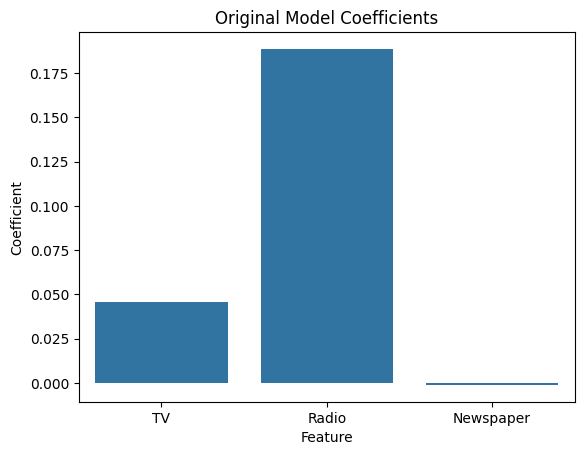

In [ ]:
#Visualize Coefficients with Bar Plot
coef_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
})

sns.barplot(x="Feature", y="Coefficient", data=coef_df)
plt.title("Original Model Coefficients")
plt.show()


In [ ]:
#Create X2 with Different Currencies
X2 = pd.DataFrame()
X2["TV"] = df["TV"] * 200        # SLR
X2["Radio"] = df["Radio"] * 1175  # KRW
X2["Newspaper"] = df["Newspaper"] * 6  # GHS

model_X2 = LinearRegression()
model_X2.fit(X2, y)

print("\nModel Coefficients with Different Currencies:")
for feature, coef in zip(X2.columns, model_X2.coef_):
    print(f"{feature}: {coef:.8f}")

y_pred = model_X2.predict(X2)
mse = mean_squared_error(y, y_pred)
print(f"MSE: {mse:.4f}")



Model Coefficients with Different Currencies:
TV: 0.00022882
Radio: 0.00016045
Newspaper: -0.00017292
MSE: 2.7841


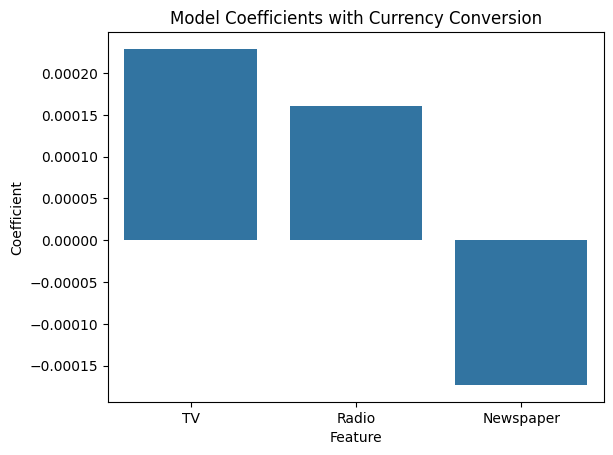

In [ ]:
#Bar Plot for X2 Coefficients
coef_df2 = pd.DataFrame({
    "Feature": X2.columns,
    "Coefficient": model_X2.coef_
})

sns.barplot(x="Feature", y="Coefficient", data=coef_df2)
plt.title("Model Coefficients with Currency Conversion")
plt.show()


In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Load data
df = pd.read_csv("colinearity.csv")

# Define predictors and response
predictors = ['x1', 'x2', 'x3', 'x4']
response = 'y'
# 1. Simple Linear Models

simple_coefs = []

print("🔹 Simple Linear Regression Coefficients:")
for col in predictors:
    X = df[[col]]
    y = df[response]

    model = LinearRegression()
    model.fit(X, y)

    coef = model.coef_[0]
    simple_coefs.append(coef)
    print(f"{col}: {coef:.4f}")


# 2. Multi-Linear Model

X_multi = df[predictors]
y = df[response]

multi_model = LinearRegression()
multi_model.fit(X_multi, y)

multi_coefs = multi_model.coef_

print("\n🔸 Multi-Linear Regression Coefficients:")
for col, coef in zip(predictors, multi_coefs):
    print(f"{col}: {coef:.4f}")


# 3. Compare Results

print("\n🔁 Comparison Table:")
for col, coef_simple, coef_multi in zip(predictors, simple_coefs, multi_coefs):
    print(f"{col}: Simple = {coef_simple:.4f}, Multiple = {coef_multi:.4f}")


🔹 Simple Linear Regression Coefficients:
x1: 34.7344
x2: 68.6344
x3: 59.3955
x4: 20.9239

🔸 Multi-Linear Regression Coefficients:
x1: -24.6099
x2: 27.7175
x3: 37.6668
x4: 19.2723

🔁 Comparison Table:
x1: Simple = 34.7344, Multiple = -24.6099
x2: Simple = 68.6344, Multiple = 27.7175
x3: Simple = 59.3955, Multiple = 37.6668
x4: Simple = 20.9239, Multiple = 19.2723


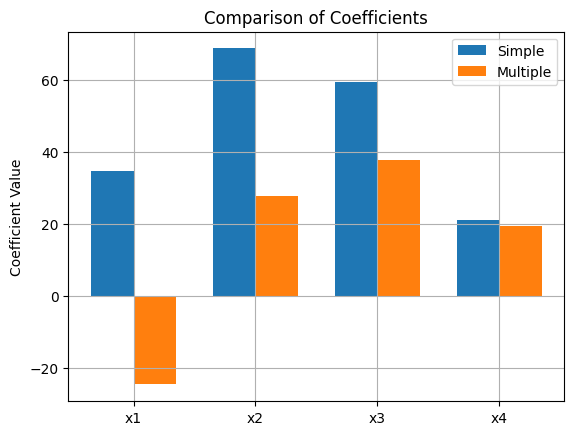

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(len(predictors))
width = 0.35

plt.bar(x - width/2, simple_coefs, width, label='Simple')
plt.bar(x + width/2, multi_coefs, width, label='Multiple')
plt.xticks(x, predictors)
plt.ylabel("Coefficient Value")
plt.title("Comparison of Coefficients")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [ ]:
df = pd.read_csv("poly.csv")
X = df[["x"]]
y = df["y"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


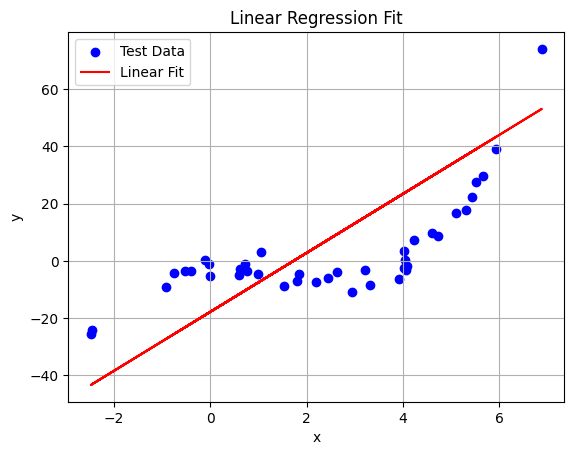

In [ ]:
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

# Predict
y_pred_linear = lin_model.predict(X_test)

# Plot linear fit
plt.scatter(X_test, y_test, color="blue", label="Test Data")
plt.plot(X_test, y_pred_linear, color="red", label="Linear Fit")
plt.title("Linear Regression Fit")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# create predictions from polynomial model
def get_poly_pred(degree, X_train, y_train, X_test):
    poly = PolynomialFeatures(degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    y_pred = model.predict(X_test_poly)
    return y_pred, model


In [ ]:
#Choose degree as you want
# overfitting (overflow)
# underfitting (underflow)
degree = 5
y_pred_poly, poly_model = get_poly_pred(degree, X_train, y_train, X_test)


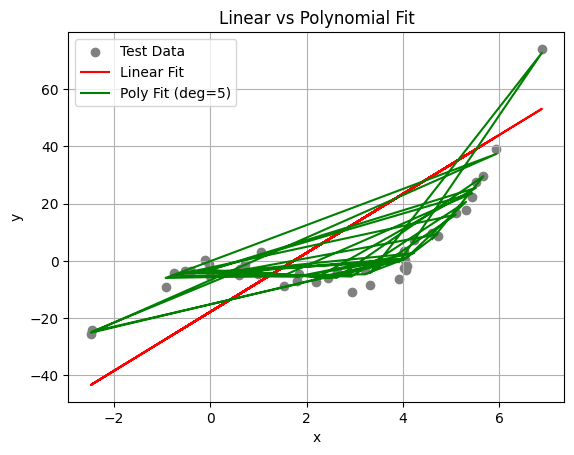

In [ ]:
plt.scatter(X_test, y_test, color="gray", label="Test Data")
plt.plot(X_test, y_pred_linear, color="red", label="Linear Fit")
plt.plot(X_test, y_pred_poly, color="green", label=f"Poly Fit (deg={degree})")
plt.title("Linear vs Polynomial Fit")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
resid_linear = y_test - y_pred_linear
resid_poly = y_test - y_pred_poly


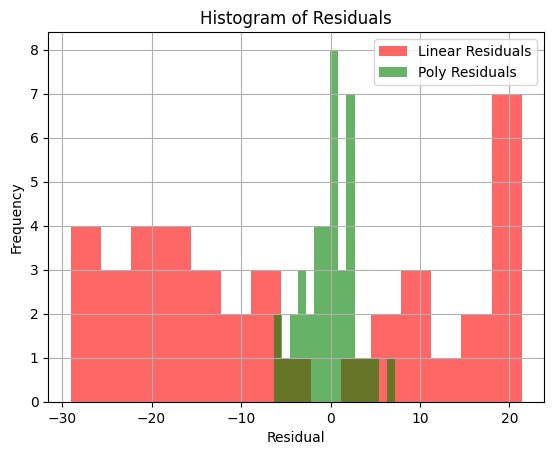

In [ ]:
plt.hist(resid_linear, bins=15, alpha=0.6, label="Linear Residuals", color="red")
plt.hist(resid_poly, bins=15, alpha=0.6, label="Poly Residuals", color="green")
plt.title("Histogram of Residuals")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()


In [30]:
#fit linear regression and polynomial regression to the data.
#Plot the fit curves of both the models along with the data and observe what the residuals.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

df = pd.read_csv("poly.csv")  # Make sure the file is in the same folder
X = df[["x"]]  # Features must be 2D
y = df["y"]



In [31]:
# Fit the linear regression model
linear_model = LinearRegression()
linear_model.fit(X, y)
y_pred_linear = linear_model.predict(X)


In [32]:
degree = 3  # Try 2, 3, or higher
poly = PolynomialFeatures(degree=degree)
X_poly = poly.fit_transform(X)

poly_model = LinearRegression()
poly_model.fit(X_poly, y)
y_pred_poly = poly_model.predict(X_poly)


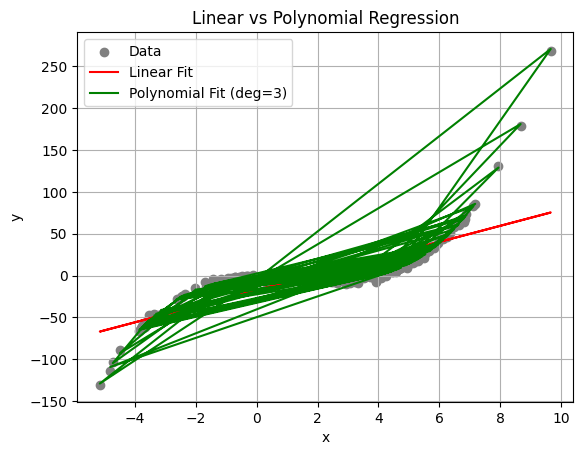

In [33]:
plt.scatter(X, y, color='gray', label='Data')
plt.plot(X, y_pred_linear, color='red', label='Linear Fit')
plt.plot(X, y_pred_poly, color='green', label=f'Polynomial Fit (deg={degree})')
plt.title('Linear vs Polynomial Regression')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


In [34]:
#Compute Residuals
resid_linear = y - y_pred_linear
resid_poly = y - y_pred_poly


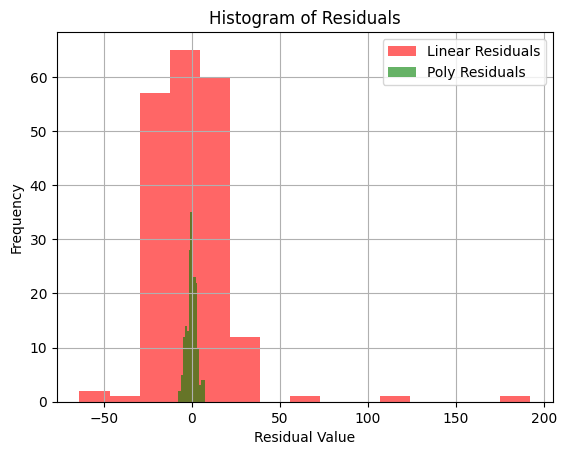

In [35]:
#Plot Residual Histograms
plt.hist(resid_linear, bins=15, alpha=0.6, label='Linear Residuals', color='red')
plt.hist(resid_poly, bins=15, alpha=0.6, label='Poly Residuals', color='green')
plt.title('Histogram of Residuals')
plt.xlabel('Residual Value')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

